In [2]:
#Notebook for capstone project
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from collections import Counter
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
print("DESCRIPTION OF THE PROBLEM")
print("Car accidents is a huge concern in most of societies. In the US, more than 3 million of people are injured every year in a car accident, and more than 30,000 people die.")
print("For this reason, it is important to understand the drivers behind car accidents, so that better policies can be implemented to reduce the aforementioned numbers.")
print("Yet, many are the factors that may be behind car accidents and their severity.") 
print("In this project, I explore some of these factors and contribute towards the understanding of how accidents can be avoided.")
print("I develop a model to predict the severity of car accidents based on weather, road and light conditions.")
print("There two main parties that may be interested in a decrease in the number of car accidents.") 
print("First, the government, which looks after its citizens, is interested in decreasing as much as possible car accidents and fatalities.")
print("Second, the citizens, as they would like to drive as safe as possible.")
print("")
print("DATA")
print("To analyze the aforementioned problem and predict the severity of car accidents based on weather, road and light conditions, the model will use data on Seattle city car accidents.")
print("The source of the data is the SDOT Traffic Management Division of the Traffic Records Group.")
print("This dataset provides labelled data, contains 194,673 observations and 37 attributes.")
print("The variable I am interested in predicting is 'SEVERITY', and it describes the fatality of an accident.")
print("The dataset is not balanced and the model will need to balance it before starting the analysis.")
print("The three atributes I will use to predict severity of car accidents are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'.")
print("I next import the dataset:")
path = 'Data-Collisions.csv'
df = pd.read_csv(path, dtype=str)
print("'SEVERITY' takes the following possible values:")
df['SEVERITYCODE'].value_counts()

DESCRIPTION OF THE PROBLEM
Car accidents is a huge concern in most of societies. In the US, more than 3 million of people are injured every year in a car accident, and more than 30,000 people die.
For this reason, it is important to understand the drivers behind car accidents, so that better policies can be implemented to reduce the aforementioned numbers.
Yet, many are the factors that may be behind car accidents and their severity.
In this project, I explore some of these factors and contribute towards the understanding of how accidents can be avoided.
I develop a model to predict the severity of car accidents based on weather, road and light conditions.
There two main parties that may be interested in a decrease in the number of car accidents.
First, the government, which looks after its citizens, is interested in decreasing as much as possible car accidents and fatalities.
Second, the citizens, as they would like to drive as safe as possible.

DATA
To analyze the aforementioned pro

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

These values can be described as:


<AxesSubplot:>

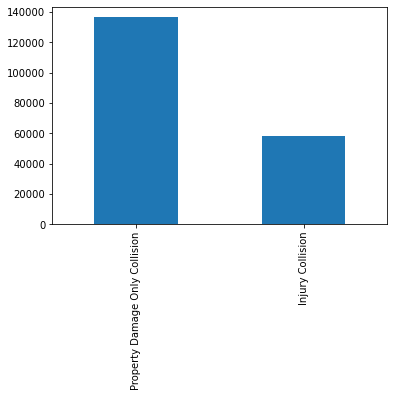

In [177]:
print("These values can be described as:")
df['SEVERITYDESC'].value_counts()
df['SEVERITYDESC'].value_counts().plot(kind = 'bar')

'WEATHER' takes the following possible values:


<AxesSubplot:>

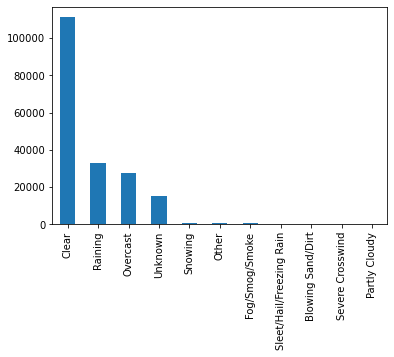

In [178]:
print("'WEATHER' takes the following possible values:")
df['WEATHER'].value_counts()
df['WEATHER'].value_counts().plot(kind = 'bar')

'ROADCOND' takes the following possible values:


<AxesSubplot:>

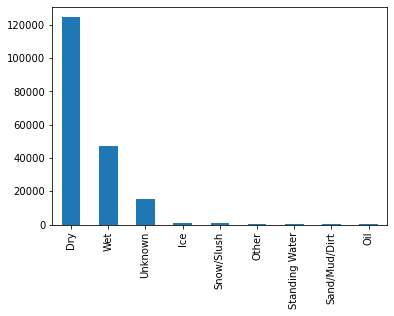

In [181]:
print("'ROADCOND' takes the following possible values:")
df['ROADCOND'].value_counts()
df['ROADCOND'].value_counts().plot(kind = 'bar')

'LIGHTCOND' takes the following possible values:


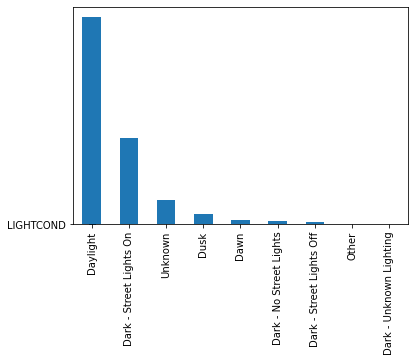

In [182]:
print("'LIGHTCOND' takes the following possible values:")
df['LIGHTCOND'].value_counts()
df['LIGHTCOND'].value_counts().plot(kind = 'bar')

In [133]:
print("METHODOLOGY")
print("I will build three models that predict the severity of car accidents based on weather, road and light conditions.")
print("")
print("The first model will consist of a K-Nearest Neighbors algorithm.")
print("The K-Nearest Neighbors algorithm is a classification algorithm. Using labelled data, the algorithm learns how to label which used to be unlabelled data points.")
print("The K-Nearest Neighbors algorithm does the previous process based on the similarity of the unlabelled data point to other labelled data points.")
print("")
print("The second model will consist of a Decision Tree.")
print("Decision Tree is a type of model that recursively splits the data so that it classifies it into more homogeneous groups that the groups before the split.")
print("Decision Trees do so by splitting the data attending to several attributes and calculating the entropy of each group after the split.")
print("Entropy is a measure of how similar is a group of data points regarding the outcome variable. A higher entropy indicates a very dissimilar group.")
print("After calculating the entropy for each group, decision trees choose the split of the attribute that provides a higher information gain, which is, that reduces the entropy more relative to the entropy of the data before the split.")
print("")
print("The third model will consist of a logistic regression.")
print("Logistic regression is a type of statistical and machine learning model that predicts a binary/categorical outcome based on other attributes of the individual.")
print("Using a sample of data for which we have information on a number of attributes and the outcome of interest, we estimate a set of parameters that indicate how important are the different attributes to predict the outcome of interest.")
print("We then use the parameters estimated together with the attributes information of other individuals for whom we do not know the outcome of interest to predict the outcome of interest.")
print("")
print("Robustness of the methodology.")
print("Given the setting of the data, and given that my outcome variable is a binary variable, the three previous models are ideal settings to give an answer to my problem.")
print("Comparing the results of the three previous models, I will provide robust evidence on whether weather, road and light conditions are important predictors of severity of car accidents.")

METHODOLOGY
I will build three models that predict the severity of car accidents based on weather, road and light conditions.

The first model will consist of a K-Nearest Neighbors algorithm.
The K-Nearest Neighbors algorithm is a classification algorithm. Using labelled data, the algorithm learns how to label which used to be unlabelled data points.
The K-Nearest Neighbors algorithm does the previous process based on the similarity of the unlabelled data point to other labelled data points.

The second model will consist of a Decision Tree.
Decision Tree is a type of model that recursively splits the data so that it classifies it into more homogeneous groups that the groups before the split.
Decision Trees do so by splitting the data attending to several attributes and calculating the entropy of each group after the split.
Entropy is a measure of how similar is a group of data points regarding the outcome variable. A higher entropy indicates a very dissimilar group.
After calculating 

In [134]:
print("I next prepare the data to estimate the previous three models and run the analysis.")

I next prepare the data to estimate the previous three models and run the analysis.


In [4]:
print("My variables of interest are string variables and I am interested in assigning a code number to each string value.")
print("I start factorizing my weather variable and assigning it missing values when the category of weather is unknown.")
df['WEATHER']=df['WEATHER'].replace("Unknown", np.NaN)
df['WEATHER2']=pd.factorize(df['WEATHER'])[0]
df['WEATHER'].value_counts()
df['WEATHER2'].value_counts()
df['WEATHER2']=df['WEATHER2'].replace(-1, np.NaN)
df['WEATHER2'].value_counts()

My variables of interest are string variables and I am interested in assigning a code number to each string value.
I start factorizing my weather variable and assigning it missing values when the category of weather is unknown.


2.0    111135
1.0     33145
0.0     27714
4.0       907
3.0       832
5.0       569
6.0       113
7.0        56
8.0        25
9.0         5
Name: WEATHER2, dtype: int64

In [5]:
print("I do the same with the rest of explanatory variables of interest")
df['ROADCOND']=df['ROADCOND'].replace("Unknown", np.NaN)
df['ROADCOND2']=pd.factorize(df['ROADCOND'])[0]
df['ROADCOND2']=df['ROADCOND2'].replace(-1, np.NaN)

df['LIGHTCOND']=df['LIGHTCOND'].replace("Unknown", np.NaN)
df['LIGHTCOND2']=pd.factorize(df['LIGHTCOND'])[0]
df['LIGHTCOND2']=df['LIGHTCOND2'].replace(-1, np.NaN)

df['ROADCOND2'].value_counts()
df['LIGHTCOND2'].value_counts()

print("I drop rows where there is a missing values in any of my explanatory variables of interest")
df=df.dropna(how='any', subset=['WEATHER2', 'ROADCOND2', 'LIGHTCOND2'])

print("My dependent variable is already an integer variable so I do not need to do anything")

I do the same with the rest of explanatory variables of interest
I drop rows where there is a missing values in any of my explanatory variables of interest
My dependent variable is already an integer variable so I do not need to do anything


In [137]:
print("K-Nearest Neighbors algorithm.")
print("")
print("I define my feature variables.")
X = df[['WEATHER2', 'ROADCOND2','LIGHTCOND2']] .values  
print("I standardize my feature variables")
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

K-Nearest Neighbors algorithm.

I define my feature variables.
I standardize my feature variables


array([[-1.85890951, -1.41629991, -0.54394895],
       [-0.63410345, -1.41629991,  0.57060517],
       [-1.85890951,  0.46184148, -0.54394895],
       [ 0.59070261,  0.46184148, -0.54394895],
       [-0.63410345, -1.41629991, -0.54394895]])

In [138]:
print("I define my labels.")
y = df['SEVERITYCODE'].values
y[0:5]

I define my labels.


array(['2', '1', '1', '1', '2'], dtype=object)

In [139]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train data:', Xtrain.shape,  ytrain.shape)
print ('Test data:', Xtest.shape,  ytest.shape)
df['SEVERITYCODE'].value_counts()

Train data: (119357, 3) (119357,)
Test data: (51153, 3) (51153,)


1    114659
2     55851
Name: SEVERITYCODE, dtype: int64

I train the model and then use it for testing, while comparing the accuracy of the model for different ks. I will select the model with a k that provides with the highest accuracy.


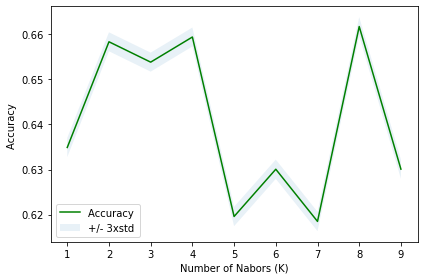

In [150]:
print("I train the model and then use it for testing, while comparing the accuracy of the model for different ks. I will select the model with a k that provides with the highest accuracy.")
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(Xtrain,ytrain)
    yhat=neigh.predict(Xtest)
    mean_acc[n-1] = metrics.accuracy_score(ytest, yhat)
    std_acc[n-1]=np.std(yhat==ytest)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [151]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print("")
print("I therefore estimate the model again using the value of K with which the model performs the best, and calculate the JAccard Score and Log loss Score to compare the model with my Tree decision model and Logistic regression")
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(Xtrain,ytrain)
yhatneigh=neigh.predict(Xtest)
yhatneighprob=neigh.predict_proba(Xtest)

print("Jaccard Score KNN model:", jaccard_similarity_score(ytest, yhatneigh))
print("Log loss Score KNN model:", log_loss(ytest, yhatneighprob))

The best accuracy was with 0.661720720192364 with k= 8

I therefore estimate the model again using the value of K with which the model performs the best, and calculate the JAccard Score and Log loss Score to compare the model with my Tree decision model and Logistic regression
Jaccard Score KNN model: 0.661720720192364
Log loss Score KNN model: 2.0428966782106426


In [152]:
print("Decision Tree model.")
print("")
print("I estimate the decision tree model with different depths and choose the depth that provides with the highest accuracy.")
Ks = 5
for n in range(1,Ks):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    Tree 
    Tree.fit(Xtrain,ytrain)
    predTree = Tree.predict(Xtest)
    print (predTree [0:5])
    print (ytest [0:5])
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(ytest, predTree))


Decision Tree model.

I estimate the decision tree model with different depths and choose the depth that provides with the highest accuracy.
['1' '1' '1' '1' '1']
['1' '2' '1' '1' '1']
DecisionTrees's Accuracy:  0.6732742947627706
['1' '1' '1' '1' '1']
['1' '2' '1' '1' '1']
DecisionTrees's Accuracy:  0.6732742947627706
['1' '1' '1' '1' '1']
['1' '2' '1' '1' '1']
DecisionTrees's Accuracy:  0.6732742947627706
['1' '1' '1' '1' '1']
['1' '2' '1' '1' '1']
DecisionTrees's Accuracy:  0.6732742947627706


In [153]:
print("Independently of the depth of the tree, I obtain a decision accuracy of 67% using my tree decision model.")
print("Jaccard Score Tree Decision:", jaccard_similarity_score(ytest, predTree))
predTreeprob = Tree.predict_proba(Xtest)
print("Log loss Score Tree Decision:", log_loss(ytest, predTreeprob))

Independently of the depth of the tree, I obtain a decision accuracy of 67% using my tree decision model.
Jaccard Score Tree Decision: 0.6732742947627706
Log loss Score Tree Decision: 0.6313378435663851


In [154]:
print("Logistic Regression.")
print("")
print("I estimate the logistic regression using the train data, predict outcomes for the test data using the parameters estimated and evaluate the accuracy of the model comparing the predicted outcomes with the real data.")
LR = LogisticRegression(C=0.01, solver='liblinear').fit(Xtrain,ytrain)
LR
yhatLR = LR.predict(Xtest)
yhatLR
yhatLRprob = LR.predict_proba(Xtest)
yhatLRprob
print("")

print("I evaluate the logistic regression using the jaccard index and log loss function")
print("Jaccard Score LR:", jaccard_similarity_score(ytest, yhatLR))
print("Log loss Score LR:", log_loss(ytest, yhatLRprob))


Logistic Regression.

I estimate the logistic regression using the train data, predict outcomes for the test data using the parameters estimated and evaluate the accuracy of the model comparing the predicted outcomes with the real data.

I evaluate the logistic regression using the jaccard index and log loss function
Jaccard Score LR: 0.6732742947627706
Log loss Score LR: 0.6315159471562749


In [155]:
print("RESULTS")
print("The analysis has consisted of a KNN model, a tree decision model and a logistic regression that have been used to predict the severity of car accidents based on weather, road and light conditions.")
print("All models have predicted that weather, road and light conditions are important predictors of the severity of car accidents.")
print("The Jaccard Score and Log loss score of all models were the following:")
print("Jaccard Score KNN model:", jaccard_similarity_score(ytest, yhatneigh))
print("Log loss Score KNN model:", log_loss(ytest, yhatneighprob))
print("Jaccard Score Tree Decision:", jaccard_similarity_score(ytest, predTree))
print("Log loss Score Tree Decision:", log_loss(ytest, predTreeprob))
print("Jaccard Score LR:", jaccard_similarity_score(ytest, yhatLR))
print("Log loss Score LR:", log_loss(ytest, yhatLRprob))
print("So not only models predict that weather, road and light conditions are important predictors of the severity of car accidents, but all models predict so in a very similar way, which provides robustness the results obtained.")

RESULTS
The analysis has consisted of a KNN model, a tree decision model and a logistic regression that have been used to predict the severity of car accidents based on weather, road and light conditions.
All models have predicted that weather, road and light conditions are important predictors of the severity of car accidents.
The Jaccard Score and Log loss score of all models were the following:
Jaccard Score KNN model: 0.661720720192364
Log loss Score KNN model: 2.0428966782106426
Jaccard Score Tree Decision: 0.6732742947627706
Log loss Score Tree Decision: 0.6313378435663851
Jaccard Score LR: 0.6732742947627706
Log loss Score LR: 0.6315159471562749
So not only models predict that weather, road and light conditions are important predictors of the severity of car accidents, but all models predict so in a very similar way, which provides robustness the results obtained.


In [156]:
print("DISCUSSION")
print("The results show that weather, road and light conditions are important drivers of the severity of accidents.")
print("For policy-makers, the results lead to the conclusion that more money should be invested to improve road and light conditions as well as to improve weather forecasts so that the severity of accidents is reduced.")
print("For drivers, the results lead to the conclusion that they should take into account weather, road and light conditions when driving in order to reduce the severity of car accidents.")

DISCUSSION
The results show that weather, road and light conditions are important drivers of the severity of accidents.
For policy-makers, the results lead to the conclusion that more money should be invested to improve road and light conditions as well as to improve weather forecasts so that the severity of accidents is reduced.
For drivers, the results lead to the conclusion that they should take into account weather, road and light conditions when driving in order to reduce the severity of car accidents.


In [157]:
print("CONCLUSION")
print("The analysis, based on three machine learning models, has concluded that weather, road and light conditions are important drivers of the severity of accidents.")

CONCLUSION
The analysis, based on three machine learning models, has concluded that weather, road and light conditions are important drivers of the severity of accidents.
